In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
world = pd.read_csv("world.csv")
world.head()

,Country Name,Time,Country Code,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],...,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,Afghanistan,2016,AFG,97.09935985,1.918810496,33.981,36.4,44.1,3.120401382,11.2,...,27.7,211.1,195,229,1.9,13.9,64.28648363,42.05418277,59.9219787,46.4
1,Albania,2016,ALB,100,0.15693402,12.08,2.9,93.1,177.7584991,66.3634447,...,13.1,68,55,82,0.4,0.2,91.02037015,97.70487655,98.28801438,24.9
2,Algeria,2016,DZA,99.97308153,0.116624156,25.25,14.8,75.7,176.265213,42.94552688,...,13.2,49.7,44,55,0.6,1.9,93.51585098,87.54231646,89.67236867,30
3,American Samoa,2016,ASM,..,..,..,..,..,..,..,...,..,..,..,..,..,..,99.69643741,55.60755445,..,..
4,Andorra,2016,AND,100,..,8.8,..,..,1883.995361,97.93063712,...,..,..,..,..,..,..,100,100,100,12.8


In [4]:
life = pd.read_csv('life.csv')
life.head()

,Country,Country Code,Year,Life expectancy at birth (years)
0,Afghanistan,AFG,2016,Low
1,Albania,ALB,2016,High
2,Algeria,DZA,2016,High
3,Angola,AGO,2016,Low
4,Antigua and Barbuda,ATG,2016,Medium


In [5]:
for index, row in world.iterrows():
    if not (row['Country Code'] in list(life['Country Code'])):
        #print(row['Country Name'])
        world.drop(index, inplace=True)
print(len(life))
print(len(world))

183
183


In [6]:
features = world.columns[3:]

to_merge = life[['Country Code', 'Life expectancy at birth (years)']]

world = world.merge(to_merge, on='Country Code')
y = world['Life expectancy at birth (years)']
world.drop(['Life expectancy at birth (years)'], inplace=True, axis =1)

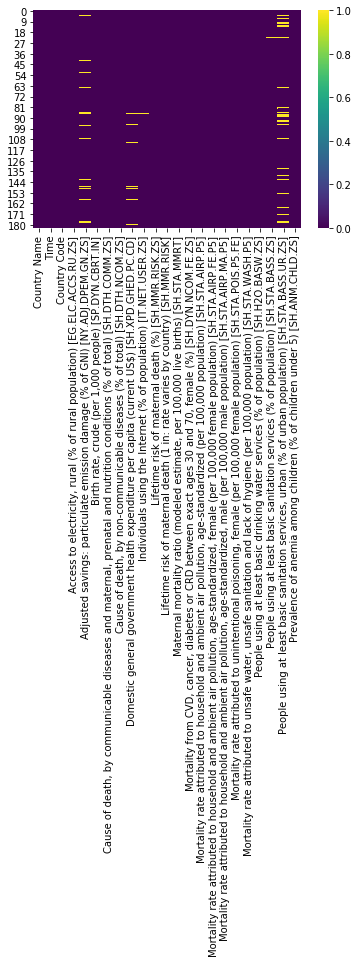

In [7]:
sns.heatmap(world=="..", cmap="viridis")

In [8]:
world_link = world[['Country Name', 'Time', 'Country Code']]
world.drop(['Country Name', 'Time', 'Country Code'], axis = 1, inplace=True)

In [9]:
world.replace(["..", np.nan], inplace=True)
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
imp_median.fit(world)
new_values = pd.DataFrame(imp_median.transform(world))
new_values.columns = features
new_values.head()

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,97.099360,1.918810,33.981,36.4,44.1,3.120401,11.200000,3.330914,30.0,673.0,27.7,211.1,195.0,229.0,1.9,13.9,64.286484,42.054183,59.921979,46.4
1,100.000000,0.156934,12.080,2.9,93.1,177.758499,66.363445,0.027187,3700.0,16.0,13.1,68.0,55.0,82.0,0.4,0.2,91.020370,97.704877,98.288014,24.9
2,99.973082,0.116624,25.250,14.8,75.7,176.265213,42.945527,0.371412,270.0,113.0,13.2,49.7,44.0,55.0,0.6,1.9,93.515851,87.542316,89.672369,30.0
3,0.000000,0.629413,41.882,63.4,27.4,42.028805,13.000000,1.501205,67.0,246.0,16.0,118.5,117.0,120.0,2.0,48.8,55.084276,48.627945,63.336756,50.9
4,100.000000,0.629413,15.717,11.9,81.8,310.397186,73.000000,0.083551,1200.0,43.0,20.0,29.9,24.0,37.0,0.4,0.1,96.739186,87.504282,63.336756,32.3


In [10]:
len(new_values.iloc[0])

20

In [11]:
poly = PolynomialFeatures(2, interaction_only=True, include_bias = False)
new_features = poly.fit_transform(new_values)

In [12]:
new_features

array([[9.70993598e+01, 1.91881050e+00, 3.39810000e+01, ...,
        2.51996984e+03, 1.95131408e+03, 2.78037981e+03],
       [1.00000000e+02, 1.56934020e-01, 1.20800000e+01, ...,
        9.60321831e+03, 2.43285143e+03, 2.44737156e+03],
       [9.99730815e+01, 1.16624156e-01, 2.52500000e+01, ...,
        7.85012688e+03, 2.62626949e+03, 2.69017106e+03],
       ...,
       [6.43598673e+01, 1.83889909e+00, 3.16270000e+01, ...,
        5.16369295e+03, 4.90754415e+03, 7.33616593e+03],
       [9.18274198e+00, 7.27591954e-01, 3.72920000e+01, ...,
        9.45260247e+02, 1.41388781e+03, 1.96397076e+03],
       [1.81287168e+01, 8.95090970e-01, 3.28640000e+01, ...,
        1.75558427e+03, 1.53838519e+03, 1.98439763e+03]])

In [13]:
len(new_features[0])

210

In [14]:
new_feat_df = pd.DataFrame(new_features)
new_feat_names = []
for i in range(1,21):
    for j in range(i,21):
        if not i == j:
            new_feat_names.append("f"+str(i)+"x"+str(j))
new_feat_names

['f1x2',
 'f1x3',
 'f1x4',
 'f1x5',
 'f1x6',
 'f1x7',
 'f1x8',
 'f1x9',
 'f1x10',
 'f1x11',
 'f1x12',
 'f1x13',
 'f1x14',
 'f1x15',
 'f1x16',
 'f1x17',
 'f1x18',
 'f1x19',
 'f1x20',
 'f2x3',
 'f2x4',
 'f2x5',
 'f2x6',
 'f2x7',
 'f2x8',
 'f2x9',
 'f2x10',
 'f2x11',
 'f2x12',
 'f2x13',
 'f2x14',
 'f2x15',
 'f2x16',
 'f2x17',
 'f2x18',
 'f2x19',
 'f2x20',
 'f3x4',
 'f3x5',
 'f3x6',
 'f3x7',
 'f3x8',
 'f3x9',
 'f3x10',
 'f3x11',
 'f3x12',
 'f3x13',
 'f3x14',
 'f3x15',
 'f3x16',
 'f3x17',
 'f3x18',
 'f3x19',
 'f3x20',
 'f4x5',
 'f4x6',
 'f4x7',
 'f4x8',
 'f4x9',
 'f4x10',
 'f4x11',
 'f4x12',
 'f4x13',
 'f4x14',
 'f4x15',
 'f4x16',
 'f4x17',
 'f4x18',
 'f4x19',
 'f4x20',
 'f5x6',
 'f5x7',
 'f5x8',
 'f5x9',
 'f5x10',
 'f5x11',
 'f5x12',
 'f5x13',
 'f5x14',
 'f5x15',
 'f5x16',
 'f5x17',
 'f5x18',
 'f5x19',
 'f5x20',
 'f6x7',
 'f6x8',
 'f6x9',
 'f6x10',
 'f6x11',
 'f6x12',
 'f6x13',
 'f6x14',
 'f6x15',
 'f6x16',
 'f6x17',
 'f6x18',
 'f6x19',
 'f6x20',
 'f7x8',
 'f7x9',
 'f7x10',
 'f7x11',
 'f7x

In [15]:
new_feat_df.columns = list(features) + new_feat_names

In [16]:
new_feat_df.head()

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]",...,f16x17,f16x18,f16x19,f16x20,f17x18,f17x19,f17x20,f18x19,f18x20,f19x20
0,97.099360,1.918810,33.981,36.4,44.1,3.120401,11.200000,3.330914,30.0,673.0,...,893.582122,584.553141,832.915504,644.96,2703.515532,3852.173303,2982.892840,2519.969844,1951.314081,2780.379812
1,100.000000,0.156934,12.080,2.9,93.1,177.758499,66.363445,0.027187,3700.0,16.0,...,18.204074,19.540975,19.657603,4.98,8893.134029,8946.211450,2266.407217,9603.218311,2432.851426,2447.371558
2,99.973082,0.116624,25.250,14.8,75.7,176.265213,42.945527,0.371412,270.0,113.0,...,177.680117,166.330401,170.377500,57.00,8186.594221,8385.787866,2805.475529,7850.126876,2626.269494,2690.171060
3,0.000000,0.629413,41.882,63.4,27.4,42.028805,13.000000,1.501205,67.0,246.0,...,2688.112683,2373.043706,3090.833692,2483.92,2678.635146,3488.859366,2803.789663,3079.936273,2475.162390,3223.840879
4,100.000000,0.629413,15.717,11.9,81.8,310.397186,73.000000,0.083551,1200.0,43.0,...,9.673919,8.750428,6.333676,3.23,8465.093073,6127.146235,3124.675717,5542.237380,2826.388321,2045.777218


In [17]:
# Creating the K Means features column
new_values.head()

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,97.099360,1.918810,33.981,36.4,44.1,3.120401,11.200000,3.330914,30.0,673.0,27.7,211.1,195.0,229.0,1.9,13.9,64.286484,42.054183,59.921979,46.4
1,100.000000,0.156934,12.080,2.9,93.1,177.758499,66.363445,0.027187,3700.0,16.0,13.1,68.0,55.0,82.0,0.4,0.2,91.020370,97.704877,98.288014,24.9
2,99.973082,0.116624,25.250,14.8,75.7,176.265213,42.945527,0.371412,270.0,113.0,13.2,49.7,44.0,55.0,0.6,1.9,93.515851,87.542316,89.672369,30.0
3,0.000000,0.629413,41.882,63.4,27.4,42.028805,13.000000,1.501205,67.0,246.0,16.0,118.5,117.0,120.0,2.0,48.8,55.084276,48.627945,63.336756,50.9
4,100.000000,0.629413,15.717,11.9,81.8,310.397186,73.000000,0.083551,1200.0,43.0,20.0,29.9,24.0,37.0,0.4,0.1,96.739186,87.504282,63.336756,32.3


In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [20]:
# New values is world but imputed
new_values['kmeans'] = kmeans.labels_
new_values.head(10)

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]",...,"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS],kmeans
0,97.099360,1.918810,33.981,36.4,44.1,3.120401,11.200000,3.330914,30.0,673.0,...,211.1,195.0,229.0,1.9,13.9,64.286484,42.054183,59.921979,46.4,0
1,100.000000,0.156934,12.080,2.9,93.1,177.758499,66.363445,0.027187,3700.0,16.0,...,68.0,55.0,82.0,0.4,0.2,91.020370,97.704877,98.288014,24.9,0
2,99.973082,0.116624,25.250,14.8,75.7,176.265213,42.945527,0.371412,270.0,113.0,...,49.7,44.0,55.0,0.6,1.9,93.515851,87.542316,89.672369,30.0,0
3,0.000000,0.629413,41.882,63.4,27.4,42.028805,13.000000,1.501205,67.0,246.0,...,118.5,117.0,120.0,2.0,48.8,55.084276,48.627945,63.336756,50.9,0
4,100.000000,0.629413,15.717,11.9,81.8,310.397186,73.000000,0.083551,1200.0,43.0,...,29.9,24.0,37.0,0.4,0.1,96.739186,87.504282,63.336756,32.3,0
5,99.732692,0.117255,17.383,15.9,77.6,710.934998,70.968981,0.095583,1000.0,40.0,...,26.6,20.0,36.0,0.5,0.4,99.078375,94.258505,95.856232,22.2,0
6,100.000000,0.490258,14.568,2.8,93.3,59.038399,64.346030,0.050548,2000.0,26.0,...,54.8,38.0,78.0,0.4,0.2,99.898536,93.406972,99.587597,31.5,0
7,100.000000,0.038765,12.900,4.6,89.5,3429.609131,86.540000,0.012335,8100.0,6.0,...,8.4,7.0,10.0,0.2,0.1,99.969972,99.991152,99.587597,13.9,1
8,100.000000,0.047684,10.000,2.6,92.2,3407.780518,84.323743,0.007393,13500.0,5.0,...,15.3,12.0,19.0,0.2,0.1,100.000000,99.974814,99.956504,12.6,1
9,100.000000,0.150554,16.300,8.8,86.6,45.298229,78.200000,0.060127,1700.0,26.0,...,63.9,51.0,80.0,0.3,1.1,90.710315,92.483095,96.443279,23.9,0


In [21]:
scaler = StandardScaler()
scaler.fit(new_values)
scaled_features = scaler.transform(new_values)
scaled_features_df = pd.DataFrame(scaled_features)
scaled_features_df.columns = list(features) + ['kmeans']
scaled_features_df.head()

C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]",...,"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS],kmeans
0,0.624987,2.998388,1.270002,0.698531,-1.129031,-0.557009,-1.293399,2.064480,-0.566782,2.141573,...,1.657252,1.611964,1.661690,1.104742,0.067469,-1.339529,-1.093429,-0.729232,0.543931,-0.498999
1,0.707983,-0.622295,-0.912459,-0.956162,1.115215,-0.409329,0.640877,-0.560413,0.020278,-0.628556,...,-0.337515,-0.380631,-0.304145,-0.516058,-0.592508,0.262404,0.808957,0.812604,-0.638900,-0.498999
2,0.707213,-0.705132,0.399947,-0.368375,0.318279,-0.410591,-0.180260,-0.286917,-0.528391,-0.219572,...,-0.592611,-0.537192,-0.665217,-0.299951,-0.510613,0.411937,0.461556,0.466362,-0.358322,-0.498999
3,-2.153339,0.348656,2.057346,2.032165,-1.893906,-0.524107,-1.230283,0.610731,-0.560863,0.341200,...,0.366438,0.501804,0.204030,1.212795,1.748726,-1.890938,-0.868709,-0.592001,0.791500,-0.498999
4,0.707983,0.348656,-0.550028,-0.511618,0.597665,-0.297165,0.873584,-0.515631,-0.379626,-0.514715,...,-0.868617,-0.821848,-0.905931,-0.516058,-0.597326,0.605084,0.460256,-0.592001,-0.231786,-0.498999


In [22]:
accuracy = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(new_values)
    new_values['kmeans'] = kmeans.labels_

    scaler = StandardScaler()
    scaler.fit(new_values)
    scaled_features = scaler.transform(new_values)
    scaled_features_df = pd.DataFrame(scaled_features)
    scaled_features_df.columns = list(features) + ['kmeans']

    knn5_FE = KNeighborsClassifier()
    X = scaled_features_df
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

    knn5_FE.fit(X_train, y_train)
    pred5 = knn5_FE.predict(X_test)

    print(confusion_matrix(y_test, pred5))
    print(classification_report(y_test, pred5))
    print("Accuracy of feature engineering: " + str(accuracy_score(y_test, pred5)) + "%")
    accuracy.append(accuracy_score(y_test, pred5))

C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all con

[[26  0  1]
 [ 0 14  2]
 [ 6  2 10]]
              precision    recall  f1-score   support

        High       0.81      0.96      0.88        27
         Low       0.88      0.88      0.88        16
      Medium       0.77      0.56      0.65        18

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.82      0.82      0.81        61

Accuracy of feature engineering: 0.819672131147541%
[[26  0  1]
 [ 0 14  2]
 [ 6  2 10]]
              precision    recall  f1-score   support

        High       0.81      0.96      0.88        27
         Low       0.88      0.88      0.88        16
      Medium       0.77      0.56      0.65        18

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.82      0.82      0.81        61

Accuracy of feature engineering: 0.819672131147541%
[[27  0  0]
 [ 0 14  2]
 [ 6  2 10]]
              precision

C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to 

[[26  0  1]
 [ 0 14  2]
 [ 6  2 10]]
              precision    recall  f1-score   support

        High       0.81      0.96      0.88        27
         Low       0.88      0.88      0.88        16
      Medium       0.77      0.56      0.65        18

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.82      0.82      0.81        61

Accuracy of feature engineering: 0.819672131147541%
[[25  0  2]
 [ 0 14  2]
 [ 7  2  9]]
              precision    recall  f1-score   support

        High       0.78      0.93      0.85        27
         Low       0.88      0.88      0.88        16
      Medium       0.69      0.50      0.58        18

   micro avg       0.79      0.79      0.79        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.79      0.78        61

Accuracy of feature engineering: 0.7868852459016393%
[[25  0  2]
 [ 0 14  2]
 [ 6  2 10]]
              precisio

C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all con

[[24  0  3]
 [ 0 14  2]
 [ 7  2  9]]
              precision    recall  f1-score   support

        High       0.77      0.89      0.83        27
         Low       0.88      0.88      0.88        16
      Medium       0.64      0.50      0.56        18

   micro avg       0.77      0.77      0.77        61
   macro avg       0.76      0.75      0.76        61
weighted avg       0.76      0.77      0.76        61

Accuracy of feature engineering: 0.7704918032786885%
[[22  0  5]
 [ 0 14  2]
 [ 6  2 10]]
              precision    recall  f1-score   support

        High       0.79      0.81      0.80        27
         Low       0.88      0.88      0.88        16
      Medium       0.59      0.56      0.57        18

   micro avg       0.75      0.75      0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

Accuracy of feature engineering: 0.7540983606557377%
[[23  0  4]
 [ 0 14  2]
 [ 6  2 10]]
              precisi

C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all con

[[25  0  2]
 [ 0 15  1]
 [ 6  3  9]]
              precision    recall  f1-score   support

        High       0.81      0.93      0.86        27
         Low       0.83      0.94      0.88        16
      Medium       0.75      0.50      0.60        18

   micro avg       0.80      0.80      0.80        61
   macro avg       0.80      0.79      0.78        61
weighted avg       0.80      0.80      0.79        61

Accuracy of feature engineering: 0.8032786885245902%
[[24  0  3]
 [ 0 15  1]
 [ 5  2 11]]
              precision    recall  f1-score   support

        High       0.83      0.89      0.86        27
         Low       0.88      0.94      0.91        16
      Medium       0.73      0.61      0.67        18

   micro avg       0.82      0.82      0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.81      0.82      0.81        61

Accuracy of feature engineering: 0.819672131147541%
[[22  0  5]
 [ 0 15  1]
 [ 7  2  9]]
              precisio

C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all con

[[25  0  2]
 [ 0 15  1]
 [ 6  3  9]]
              precision    recall  f1-score   support

        High       0.81      0.93      0.86        27
         Low       0.83      0.94      0.88        16
      Medium       0.75      0.50      0.60        18

   micro avg       0.80      0.80      0.80        61
   macro avg       0.80      0.79      0.78        61
weighted avg       0.80      0.80      0.79        61

Accuracy of feature engineering: 0.8032786885245902%
[[25  0  2]
 [ 0 15  1]
 [ 5  2 11]]
              precision    recall  f1-score   support

        High       0.83      0.93      0.88        27
         Low       0.88      0.94      0.91        16
      Medium       0.79      0.61      0.69        18

   micro avg       0.84      0.84      0.84        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.84      0.83        61

Accuracy of feature engineering: 0.8360655737704918%
[[22  0  5]
 [ 0 15  1]
 [ 4  2 12]]
              precisi

C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\jaypr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [23]:
accuracy

[0.819672131147541,
 0.819672131147541,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.7868852459016393,
 0.8032786885245902,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.8032786885245902,
 0.819672131147541,
 0.7540983606557377,
 0.8032786885245902,
 0.8360655737704918,
 0.8032786885245902,
 0.8360655737704918]

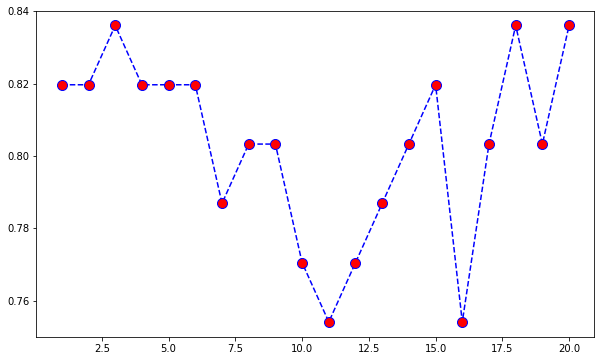

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21), accuracy,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [63]:
# Part 2 using PCA
pcaMeans = PCA(n_components=20).fit(new_values).transform(new_values)
pcaMeans

array([[-3.60367937e+03, -2.80646623e+02,  4.66776551e+02, ...,
         4.89139126e-01,  9.16361343e-01, -1.80982831e-01],
       [ 7.42424772e+01, -4.85918765e+02, -1.87728831e+02, ...,
         1.17850002e-01, -1.23979431e-01, -2.50868892e-02],
       [-3.33477314e+03, -1.01335728e+02, -1.44036885e+02, ...,
         4.18699471e-01, -2.95939027e-01,  1.30941765e-01],
       ...,
       [-3.48074421e+03, -2.16995228e+02, -1.12428678e+00, ...,
         1.01389471e+00,  7.43428289e-01,  2.19166893e-01],
       [-3.53655637e+03, -2.45895865e+02,  2.33664187e+01, ...,
         9.26710399e-02,  9.33101366e-03,  2.72540657e-03],
       [-3.57302929e+03, -2.27603560e+02,  2.46436809e+02, ...,
         5.79595647e-01,  2.01814181e-01,  7.69053462e-02]])

In [68]:
pcaMeans_df = pd.DataFrame(pcaMeans)
pcaMeans_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3603.679370,-280.646623,466.776551,23.890756,81.295743,21.279841,37.849947,-18.610831,-7.204321,-6.025934,15.348122,25.343277,11.353093,3.930585,1.196393,-1.345986,0.194176,0.489139,0.916361,-0.180983
1,74.242477,-485.918765,-187.728831,0.656398,23.871093,-5.589329,-3.226988,7.059391,-0.412164,-5.511823,-10.224430,0.354199,4.180832,-2.350577,-0.995404,-1.808368,-0.668043,0.117850,-0.123979,-0.025087
2,-3334.773143,-101.335728,-144.036885,68.464635,8.278074,8.890120,3.599463,-13.395532,2.100305,-2.252996,-1.975687,2.167724,0.512682,4.702374,-3.394269,-2.748338,0.066995,0.418699,-0.295939,0.130942
3,-3555.295612,-223.602010,40.074782,-3.620969,-82.413533,-0.207173,-39.594517,-8.363071,-12.595722,7.910766,-15.045664,-1.430790,1.680842,1.047320,-2.195916,0.260832,0.339435,-0.311900,-0.131633,0.122779
4,-2394.375392,-69.452053,-202.608210,68.808279,-6.917636,-18.626363,20.517274,5.444901,6.141078,5.244962,1.361552,-5.652019,6.092389,1.161433,-1.321597,6.643391,0.135436,-0.190344,0.347642,-0.104000


In [72]:
pcaMeans_df.sum()

0    -1.364242e-12
1    -5.883294e-12
2    -3.410605e-13
3    -7.673862e-13
4    -1.513456e-12
5     1.332268e-15
6     6.137313e-13
7    -6.714629e-13
8    -3.872458e-13
9     1.123102e-12
10    2.716161e-13
11    6.750156e-14
12    1.427747e-13
13   -3.357314e-13
14    7.962520e-13
15   -1.310063e-14
16    1.872336e-12
17   -2.119416e-13
18    1.770806e-14
19   -5.581646e-14
dtype: float64